In [ ]:
def calcular_distancia_manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [ ]:
def a_estrellita(mapa, inicio, final):
  rows = len(mapa)
  cols = len(mapa[0])

  nodos_visitados = set()

  g_score = {node: float('inf') for row in range(rows) for node in [(row, col) for col in range(cols)]}
  g_score[inicio] = 0

  f_score = {node: float('inf') for row in range(rows) for node in [(row, col) for col in range(cols)]}
  f_score[inicio] = calcular_distancia_manhattan(inicio, final)


  conj_abierto = [inicio]
  viene_de = {}

  while conj_abierto:
      nodo_actual = None
      min_f_score = float('inf')

      for node in conj_abierto:
          if f_score[node] < min_f_score:
              min_f_score = f_score[node]
              nodo_actual = node

      if nodo_actual is None:
          break

      conj_abierto.remove(nodo_actual)


      if nodo_actual == final: # -> se llego al destino final
          ruta = []
          while nodo_actual in viene_de:
              ruta.append(nodo_actual)
              nodo_actual = viene_de[nodo_actual]
          ruta.append(inicio)
          ruta.reverse()
          return ruta

      nodos_visitados.add(nodo_actual) # -> metemos a los nodos ya visitados

      # Explorar vecinos
      vecinos = []
      row, col = nodo_actual

      for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]: # -> direcciones pobsiles
          new_row, new_col = row + dr, col + dc
          if 0 <= new_row < rows and 0 <= new_col < cols and mapa[new_row][new_col] == 0:
              vecinos.append((new_row, new_col))

      for vecino in vecinos:
          if vecino in nodos_visitados:
              continue

          tentative_g_score = g_score[nodo_actual] + 1

          if tentative_g_score < g_score[vecino]:

              viene_de[vecino] = nodo_actual
              g_score[vecino] = tentative_g_score
              f_score[vecino] = g_score[vecino] + calcular_distancia_manhattan(vecino, final)

              if vecino not in conj_abierto:
                  conj_abierto.append(vecino)

  return None

In [ ]:
def leer_mapa(ruta_archivo):
    with open(ruta_archivo, 'r') as f:
        lines = f.readlines()
        mapa = []

        for line in lines:
            row = [int(x) for x in line.split()]
            mapa.append(row)

        return mapa

In [ ]:
# Crear el archivo txt
almacen_mapa = """
0 0 0 0 1
0 1 0 1 0
0 1 0 0 0
0 0 0 1 0
1 1 0 0 0
"""

with open("almacen.txt", "w") as f:
    f.write(almacen_mapa.strip())


## Dibujo de Grafos
(aqui se hizo uso de la IA Gemini)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

In [ ]:
def visualizar_a_estrella(mapa, inicio, final, ruta=None, nodos_explorados=None):
    """Visualiza el mapa, la ruta y los nodos explorados"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    rows = len(mapa)
    cols = len(mapa[0])

    # Crear una matriz para los colores
    color_map = np.zeros((rows, cols, 3))

    # Colorear el mapa base
    for i in range(rows):
        for j in range(cols):
            if mapa[i][j] == 1:  # Obstáculos
                color_map[i][j] = [0.2, 0.2, 0.2]  # Gris oscuro
            else:  # Espacios libres
                color_map[i][j] = [1, 1, 1]  # Blanco

    # Colorear nodos explorados
    if nodos_explorados:
        for nodo in nodos_explorados:
            if nodo != inicio and nodo != final:
                color_map[nodo[0]][nodo[1]] = [0.7, 0.9, 1.0]  # Azul claro

    # Colorear la ruta óptima
    if ruta:
        for nodo in ruta:
            if nodo != inicio and nodo != final:
                color_map[nodo[0]][nodo[1]] = [0.2, 0.8, 0.2]  # Verde

    # Colorear inicio y final
    color_map[inicio[0]][inicio[1]] = [1, 0.2, 0.2]  # Rojo (inicio)
    color_map[final[0]][final[1]] = [0.2, 0.2, 1]   # Azul (final)

    # Mostrar el mapa
    ax.imshow(color_map, origin='upper')

    # Dibujar la grilla
    for i in range(rows + 1):
        ax.axhline(i - 0.5, color='black', linewidth=0.5)
    for j in range(cols + 1):
        ax.axvline(j - 0.5, color='black', linewidth=0.5)

    # Dibujar la ruta con líneas
    if ruta and len(ruta) > 1:
        ruta_y = [nodo[0] for nodo in ruta]
        ruta_x = [nodo[1] for nodo in ruta]
        ax.plot(ruta_x, ruta_y, 'g-', linewidth=3, alpha=0.7, label='Ruta óptima')

    # Agregar números a las celdas para mostrar el orden de exploración
    if nodos_explorados:
        for idx, nodo in enumerate(nodos_explorados):
            ax.text(nodo[1], nodo[0], str(idx+1), ha='center', va='center',
                   fontsize=8, fontweight='bold', color='darkblue')

    # Marcar inicio y final con texto
    ax.text(inicio[1], inicio[0], 'S', ha='center', va='center',
           fontsize=12, fontweight='bold', color='white')
    ax.text(final[1], final[0], 'G', ha='center', va='center',
           fontsize=12, fontweight='bold', color='white')

    # Configurar los ejes
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xlabel('Columnas')
    ax.set_ylabel('Filas')
    ax.set_title('Algoritmo A* - Búsqueda de Ruta Óptima')

    # Crear leyenda
    legend_elements = [
        mpatches.Patch(color='red', label='Inicio (S)'),
        mpatches.Patch(color='blue', label='Destino (G)'),
        mpatches.Patch(color='gray', label='Obstáculos'),
        mpatches.Patch(color='lightblue', label='Nodos explorados'),
        mpatches.Patch(color='green', label='Ruta óptima'),
        mpatches.Patch(color='white', label='Espacios libres')
    ]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

In [ ]:
def main():
  mapa_almacen_cargado = leer_mapa("almacen.txt")
  inicio = (0, 0)
  final = (4, 4)

  # Hallar ruta mas corta
  ruta = a_estrellita(mapa_almacen_cargado, inicio, final)
  if ruta:
    print(f"La ruta mas corta es: \n{ruta}")
    print("===Grafo con ruta=== \n")
    visualizar_a_estrella(mapa_almacen_cargado, inicio, final, ruta)

  else:
    print("No se ha encontrado una ruta :(")

La ruta mas corta es: 
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
===Grafo con ruta=== 



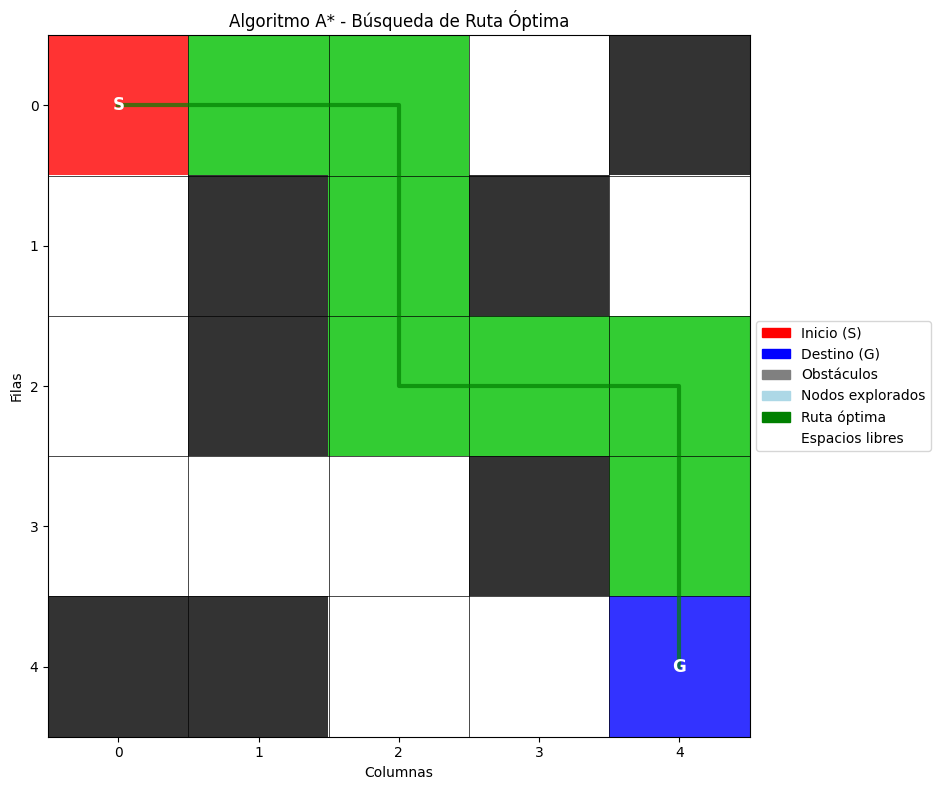

In [ ]:
if __name__ == "__main__":
  main()

## Sustentacion

El algoritmo A* es una elección adecuada para este problema porque:

1. Garantiza la ruta más corta: Con una heurística admisible (como la distancia de Manhattan, que nunca sobreestima el costo real), A* encuentra la ruta más corta.
2. Eficiencia: Combina la búsqueda en profundidad (utilizando el costo real g_score) con la búsqueda de primero el mejor (utilizando la heurística h_score para estimar el costo restante). Esto lo hace más eficiente que algoritmos como Dijkstra en muchos casos, ya que guía la búsqueda hacia el objetivo.
3. Considera obstáculos: El algoritmo A* se modifica fácilmente para manejar obstáculos, ya que simplemente no explora los nodos correspondientes a las celdas bloqueadas.
4. Utiliza la heurística de distancia de Manhattan: La distancia de Manhattan es apropiada para una cuadrícula donde solo se permiten movimientos ortogonales, como en este caso.